In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'axes.edgecolor':'0.1', 'grid.color':'0.9'})
import pandas as pd
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

In [2]:
data = {}

In [3]:
df1 = pd.read_csv('ModelSweep-21-06-2024-0103.csv')
data['DSPy (vanilla)'] = df1[df1['Program'].str.match(r'^DSPy$')]
data['MTLLM'] = df1[df1['Program'].str.match('Jac')]
df3 = pd.read_csv("ModelSweep-25-06-2024-2249.csv")
data['DSPy (compiled)'] = df3
fr_labels = ['DSPy (vanilla)','DSPy (compiled)','MTLLM']
df = pd.concat([data[framework] for framework in fr_labels])
df = df[df["QuestionID"] <=2050]
models = ["gpt-3.5-turbo", "gpt-4", "gpt-4-turbo", "gpt-4o"]
df['Tokens'] = df['PromptTokens'] + df['CompletionTokens']

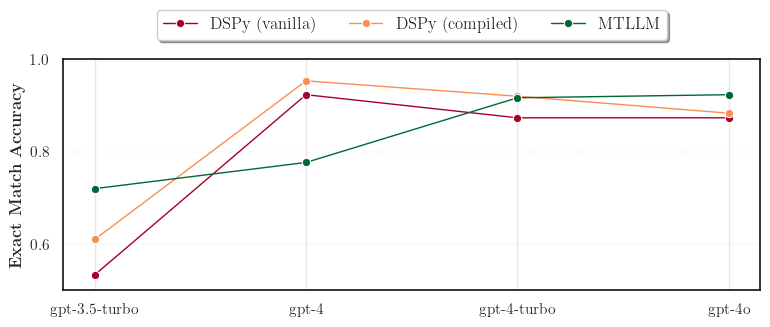

In [4]:
fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.25),plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Exact Match Accuracy}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.ylim(0.5, 1)
plt.show
plt.savefig('ExactMatchAcccuracy.png', dpi=300, bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

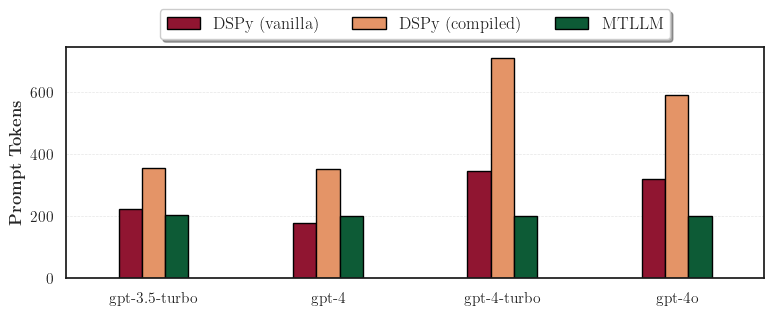

In [5]:
fig, ax = plt.subplots(figsize=(9, 3))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(x="Model", y="PromptTokens", hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
ax.legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Prompt Tokens}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0, 1)
plt.savefig('PromptTok.png', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

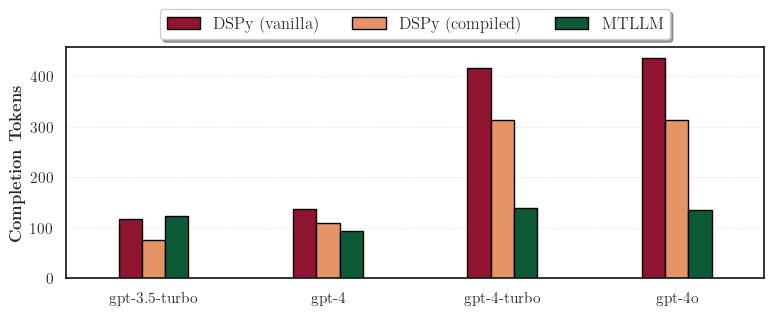

In [6]:
fig, ax = plt.subplots(figsize=(9, 3))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(x="Model", y="CompletionTokens", hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
ax.legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0, 1)
plt.savefig('CompletionTok.png', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

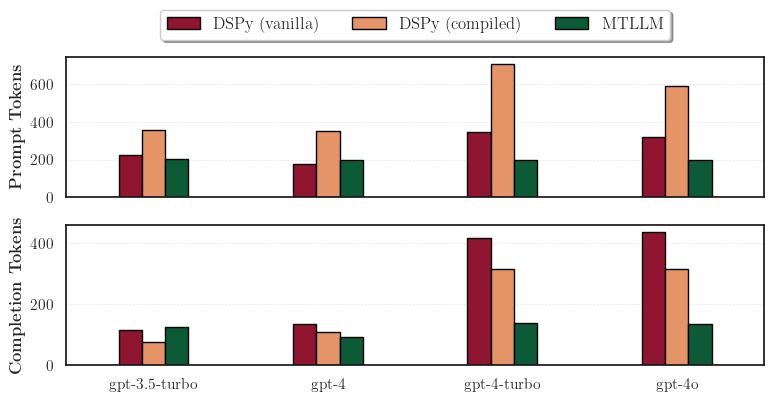

In [7]:
fig, axes = plt.subplots(2,1,figsize=(9, 4))

for i,plot in enumerate(["PromptTokens","CompletionTokens"]):
    # colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
    sns.barplot(x="Model", y=plot, hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=axes[i],edgecolor='black', linewidth=1)
    axes[i].set_xlabel("")
    # axes[i].set_ylabel("")
    if plot == "PromptTokens":
        axes[i].set_ylabel(r"\centering\textbf{Prompt Tokens}", fontsize=12)
        axes[i].legend().set_visible(False)
        axes[i].set_xticklabels([])
    else:
        axes[i].set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
        axes[i].legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 2.6), ncol=4)
    axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
    # ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    # plt.ylim(0, 400)
    plt.savefig('Token_usage.png', dpi=300, bbox_inches='tight')
plt.show

## New Data plots

In [8]:
data = {}

df_1 = pd.read_csv('ModelSweep-08-10-2024-1052-70B.csv')
# df_1 = pd.read_csv('ModelSweep-16-09-2024-1329.csv')
# df_1 = pd.read_csv('ModelSweep-01-10-2024-1303-70B.csv')
data['DSPy (vanilla)'] = df_1[df_1['Program'].str.match(r'^DSPy$')]
data['MTLLM'] = df_1[df_1['Program'].str.match('Jac')]
fr_labels = ['DSPy (vanilla)','MTLLM']
dff = pd.concat([data[framework] for framework in fr_labels])
dff = dff[dff["QuestionID"] <=2050]
models = ["gpt-3.5-turbo", "gpt-4", "gpt-4-turbo", "gpt-4o"]
# dff = dff[dff['Failed'] == False]


In [9]:
import ast

def extract_tokens(row):
    raw_response = row['RawResponse']
    program = row['Program']
    try:
        response_dict = ast.literal_eval(raw_response)
        if program == 'DSPy':
            # response_dict = response_dict[0]  # Extract the first dictionary from the list
            # prompt_tokens = response_dict['usage']['prompt_tokens']
            # completion_tokens = response_dict['usage']['completion_tokens']
            prompt_tokens = row['PromptTokens']
            completion_tokens = row['CompletionTokens']
        elif program == 'Jac':
            raw_response = row['RawResponse']
            program = row['Program']        
            response_dict = response_dict[0]
            prompt_tokens = response_dict['usage']['prompt_tokens']   # Example logic for Jac
            completion_tokens = response_dict['usage']['completion_tokens']   # Example logic for Jac
        # else:
            # prompt_tokens, completion_tokens = None, None
        
        return prompt_tokens, completion_tokens
    except (ValueError) as e: 
        prompt_tokens = row['PromptTokens']
        completion_tokens = row['CompletionTokens']
        return prompt_tokens, completion_tokens

dff['PromptTokens'], dff['CompletionTokens'] = zip(*dff.apply(extract_tokens, axis=1))
df['PromptTokens'], df['CompletionTokens'] = zip(*df.apply(extract_tokens, axis=1))



In [10]:
dff['Tokens'] = dff['PromptTokens'] + dff['CompletionTokens']
# dff

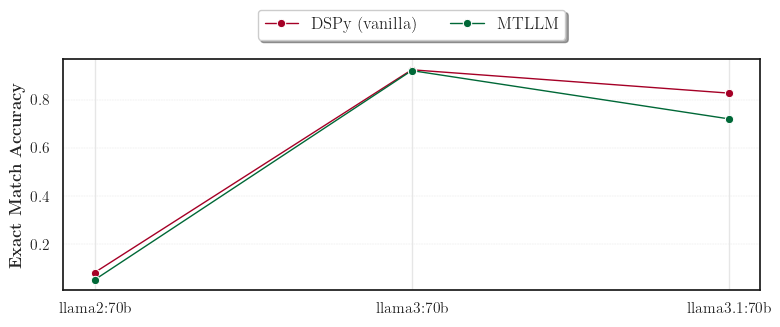

In [11]:
fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(1.0)]
fr_colors = {'DSPy':colors[0], 'Jac':colors[1]}
order = ['DSPy','Jac']
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(hue_order = order,x="Model", y="ExactMatch",hue="Program", data=dff, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=dff, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
# sns.lineplot(hue_order = order,x="Model", y="ExactMatch",hue="Program", data=dff, estimator = np.mean, errorbar=None, palette = fr_colors, ax=ax, linewidth=1)

handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Exact Match Accuracy}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0.5, 1)
plt.show
plt.savefig('ExactMatchAcccuracy_llama.png', dpi=300, bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

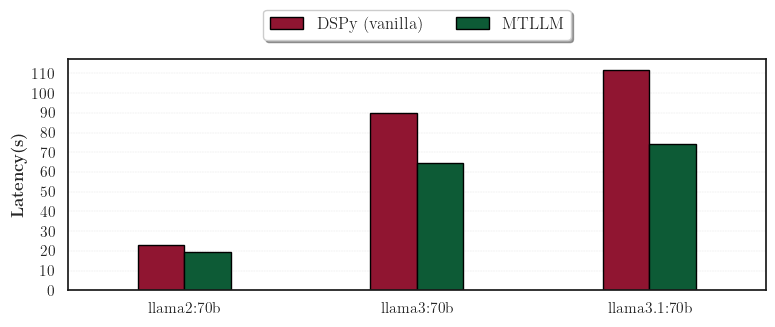

In [12]:
fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.7),plt.cm.RdYlGn(1.0)]
fr_colors = {'DSPy':colors[0], 'Jac':colors[2]}
order = ['DSPy', 'Jac']
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(hue_order = order,x="Model", y="Time(s)",hue="Program", data=dff, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Latency(s)}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
# plt.ylim(0.5, 1)
plt.show
# plt.savefig('ExactMatchAcccuracy_llama.png', dpi=300, bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

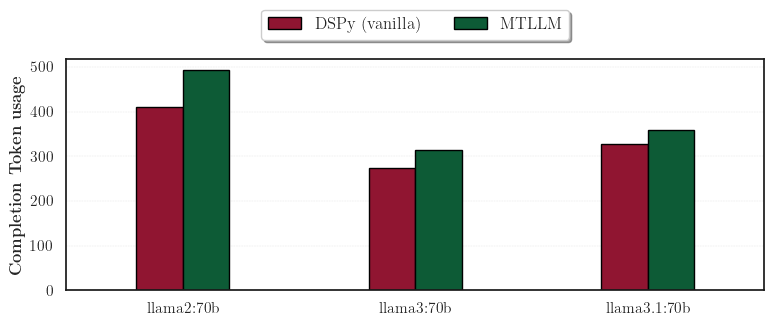

In [13]:
fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.7),plt.cm.RdYlGn(1.0)]
fr_colors = {'DSPy':colors[0], 'DSPy_Compiled':colors[1], 'Jac':colors[2]}
order = ['DSPy' , 'Jac']
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(hue_order = order,x="Model", y="Tokens",hue="Program", data=dff, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Completion Token usage}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
# plt.ylim(0.5, 1)
plt.show
# plt.savefig('ExactMatchAcccuracy_llama.png', dpi=300, bbox_inches='tight')

In [14]:
# Calculate the length of each question
dff['QuestionLength'] = dff['Question'].apply(len)

# Calculate the average and standard deviation of the question lengths
average_length = dff['QuestionLength'].mean()
std_dev_length = dff['QuestionLength'].std()

print(f"Average Question Length: {average_length}")
print(f"Standard Deviation of Question Length: {std_dev_length}")

Average Question Length: 238.27666666666667
Standard Deviation of Question Length: 86.40841855461483


```bash
Average Question Length: 238.73378264532434
Standard Deviation of Question Length: 87.49588222214403
```

In [15]:
# Assuming 'dff' is your DataFrame
# Filter relevant columns
dfff = dff[['Model', 'Program', 'ExactMatch', 'Failed', 'RawResponse']]

# Define response categories
conditions = [
    (dfff['ExactMatch'] == True) & (dfff['Failed'] == False),
    (dfff['ExactMatch'] == False) & (dfff['Failed'] == False),
    (dfff['Failed'] == True) & (dfff['RawResponse'] != '[]'),
    (dfff['RawResponse'] == '[]')
]
choices = ['Accurate', 'Not Accurate', 'Failed', 'Timeout']

# Create a new column for response category
dfff['ResponseCategory'] = np.select(conditions, choices, default='Unknown')

# Aggregate counts
agg_df = dfff.groupby(['Model', 'Program', 'ResponseCategory']).size().reset_index(name='Count')


/tmp/ipykernel_2139266/837769474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff['ResponseCategory'] = np.select(conditions, choices, default='Unknown')


In [16]:

desired_order = ['llama2:70b', 'llama3:70b', 'llama3.1:70b.DSPY']
# Pivot the dataframe to get a suitable format for stacked barplot
# agg_df  =pd.Categorical(df['Model'],categories=desired_order,ordered=True)
agg_df_1 = agg_df[agg_df['Model'] == 'llama3.1:70b']
agg_df_2 = agg_df[agg_df['Model'] != 'llama3.1:70b']
agg_df = pd.concat([agg_df_2, agg_df_1], ignore_index=True)


agg_df


,Model,Program,ResponseCategory,Count
0,llama2:70b,DSPy,Accurate,25
1,llama2:70b,DSPy,Failed,242
2,llama2:70b,DSPy,Not Accurate,28
3,llama2:70b,DSPy,Timeout,5
4,llama2:70b,Jac,Accurate,16
5,llama2:70b,Jac,Failed,259
6,llama2:70b,Jac,Not Accurate,25
7,llama3:70b,DSPy,Accurate,277
8,llama3:70b,DSPy,Failed,1
9,llama3:70b,DSPy,Not Accurate,22


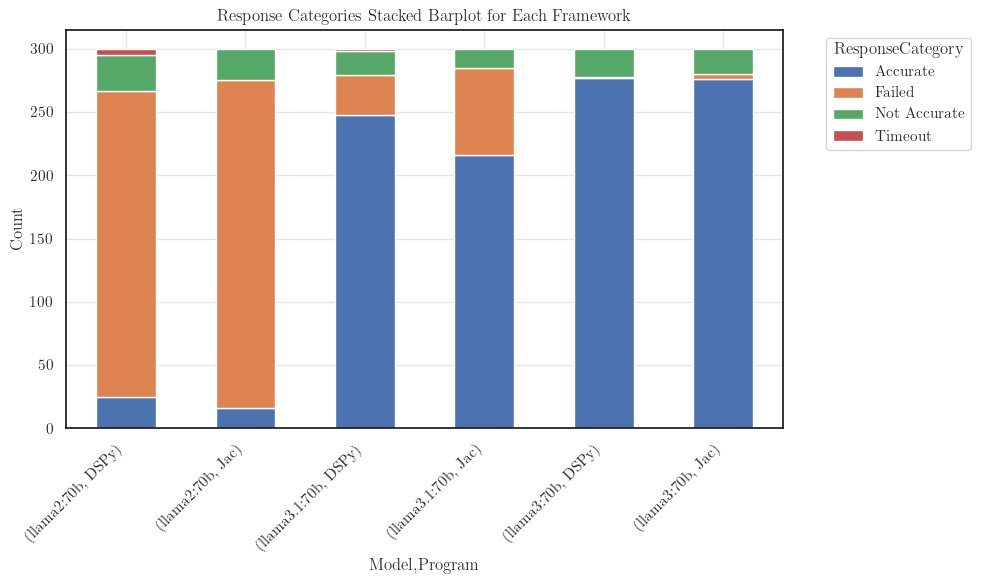

In [17]:


df_pivot = agg_df.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0)

# Plotting
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.ylabel('Count')
plt.title('Response Categories Stacked Barplot for Each Framework')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ResponseCategory', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()